In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

!cp '/content/gdrive/My Drive/Datos/Datos.dat' 'Datos.dat'
!cp '/content/gdrive/My Drive/Datos/Datos(copia).dat' 'Datos(copia).dat'
!cp '/content/gdrive/My Drive/Datos/Datos1.dat' 'Datos1.dat'
!cp '/content/gdrive/My Drive/Datos/Datos1(copia).dat' 'Datos1(copia).dat'
!cp '/content/gdrive/My Drive/Datos/Datos2.dat' 'Datos2.dat'
!cp '/content/gdrive/My Drive/Datos/Datos3.dat' 'Datos3.dat'
!cp '/content/gdrive/My Drive/Datos/Datos3(copia).dat' 'Datos3(copia).dat'
!cp '/content/gdrive/My Drive/Datos/ReadMe Datos 1' 'ReadMe Datos 1'
!cp '/content/gdrive/My Drive/Datos/Secuencia_principal.dat' 'Secuencia_principal.dat'
!cp '/content/gdrive/My Drive/Datos/Gigantes.dat' 'Gigantes.dat'
!cp '/content/gdrive/My Drive/Datos/Super_gigantes.dat' 'Super_gigantes.dat'

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


# 1. Opacidad solar:

**a)** Apartir de el número de electrones en el Sol ($8.34 \times 10^{20} electrones/cm^3$), el radio del electrón ($2.8 \times 10^{-15} m$) y la densidad del Sol ($1.4 g/cm^3$), calcule la opacidad y el camino libre medio en el Sol.

In [ ]:

#n = 8.34e+26 #elec/m^3 Dada por enunciado
a_o = 2.8e-15 #m
rho = 1400 #kg/m^3
m_h = 1.7e-27 #masas del hidrogeno
n = rho/m_h

#sección eficaz
sigma = np.pi*(2*a_o)**2


#camino libre medio del sol

l = 1/(n*sigma)

#Opacidad

k = 1/(l*rho)

#tiempo de salida del elctron

print(f"La sección eficaz:{sigma} m^2")
print(f"La opacidad del Sol es:{k} m^2 kg^-1")
print(f"El camino libre medio del Sol es:{l} m")

La sección eficaz:9.852034561657592e-29 m^2
La opacidad del Sol es:0.05795314448033878 m^2 kg^-1
El camino libre medio del Sol es:0.012325227918013031 m


**b)** Como el camino libre medio de los fotones en el Sol es muchísimo menor que el radio del Sol, cada fotón sufrirá muchas colisiones desde que es producido por las reacciones nucleares en el centro del Sol, hasta escapar en su superficie. ¿Cuántas colisiones sufre en promedio cada fotón?, ¿Cuál es la distancia promedio recorrida por cada fotón? y ¿Cuánto tiempo tarda en escapar? Suponga que el fotón desarrolla un camino aleatorio al interior del Sol, con igual probabilidad de moverse en cualquier dirección.

- Haga los cálculos analíticos necesarios para dar respuesta a estas preguntas
- Realice una simulación numérica donde evidencia la solución del problema anterior. ¿Concuerdan los resultados numéricos con los analíticos?

In [ ]:
R = 696340000 #m radio del sol
c = 3e+8 #m/s
n_e = n*((4*np.pi)/3)*R**3
#profundidad optica 

tau = k*rho*R

#número de pasos

#N = tau**2
N = (R/l)**2 #Da los mismo si uso está o la otra

#Distancia recorrida por cada fotón
d = N*l

#cuanto tiempo tarda en escapar
#t = (3*n_e*sigma)/(4*np.pi*c*R)
#t = N*(l/c)
t = (R**2*n*sigma)/c

print("El numero de colisiones que da el fotón es de :  %.3e" %(N) ,"")
print("La distancia promedio que tiene cada fotón :  %.3e" %(d) ,"m")
print("tiempo en el que tarda en escapar : %.3e" %(t/3.154e+7), "años" )


El numero de colisiones que da el fotón es de :  3.192e+21 
La distancia promedio que tiene cada fotón :  3.934e+19 m
tiempo en el que tarda en escapar : 4.158e+03 años


Text(0.5, 0.92, '3D Random Walk')

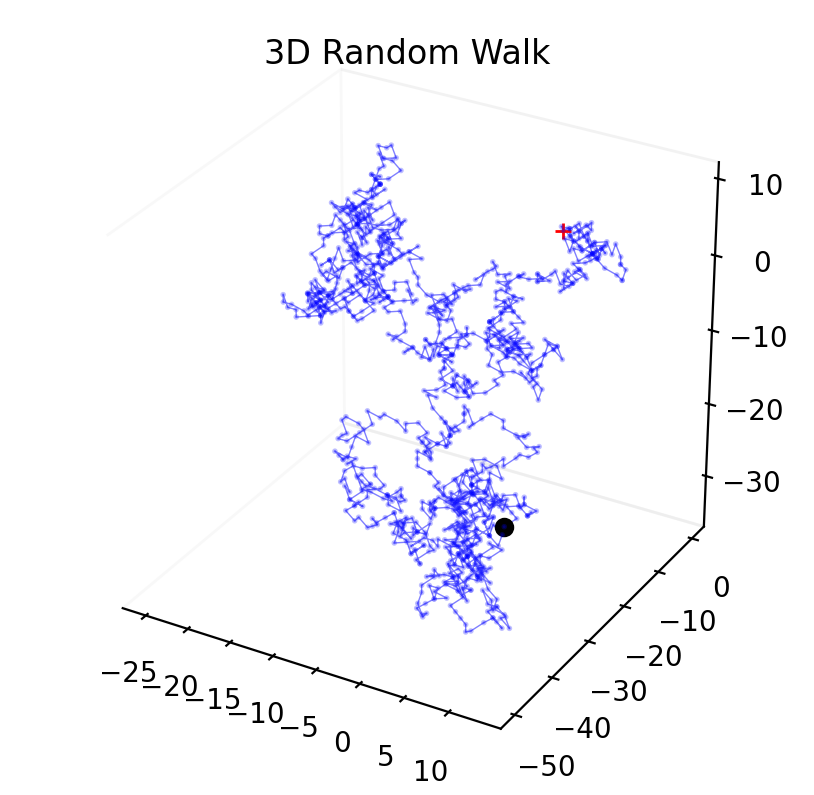

In [ ]:
import random

dims = 3
#step = [int(-l),0,int(l)]
step = [-1,0,1]
origin = np.zeros((1,dims))

#step_shape = (int(N), dims)
step_shape = (1300, dims)
steps = np.random.choice(a=step, size=step_shape)
path = np.concatenate([origin, steps]).cumsum(0)
start = path[:1]
stop = path[-1:]
# Plot the path
fig = plt.figure(figsize=(5,5),dpi=200)
ax = fig.add_subplot(111, projection='3d')
ax.grid(False)
ax.xaxis.pane.fill = ax.yaxis.pane.fill = ax.zaxis.pane.fill = False

ax.scatter3D(path[:,0], path[:,1], path[:,2], c='blue', alpha=0.25,s=1)
ax.plot3D(path[:,0], path[:,1], path[:,2], c='blue', alpha=0.5, lw=0.5)
ax.plot3D(start[:,0], start[:,1], start[:,2], c='red', marker='+')
ax.plot3D(stop[:,0], stop[:,1], stop[:,2], c='black', marker='o')
plt.title('3D Random Walk')

# 2.**Transferencia radiativa:** En el archivo "Datos" se le proporcionan los resultados de una simulación del interior del Sol. Con estos datos realice lo siguiente

**a)** Encuentre la profundidad óptica en cada punto integrado numéricamente la ecuación $d\tau = -\kappa \rho d s$

In [ ]:
import pandas as pd
from io import StringIO

tabla = pd.read_fwf('Datos(copia).dat')

tau = tabla['tau'] #profundidad optica
kappa = tabla['kap'] #opacidad
Rho = tabla['rho'] #densidad
s = tabla['r'] #distancia

tabla

,zone,r,tau,1-M_r/Ms,L_r,T,P,rho,kap,eps,dlnPdlnT
0,0,737200000.0,0.000000e+00,0.000000e+00,3.298000e+26,0.0,0.000000e+00,0.000000e+00,0.0000,0.000E+00,r 99.9
1,1,736400000.0,1.356000e-01,3.908000e-14,3.298000e+26,3167.0,6.818000e-01,1.548000e-08,23.7600,9.409-108,r 1.0
2,2,736400000.0,1.356000e-01,1.087000e-13,3.298000e+26,8562.0,5.669000e+00,4.290000e-08,1.6860,2.147E-79,c 1.7
3,3,735700000.0,1.356000e-01,1.890000e-13,3.298000e+26,13970.0,1.143000e+01,1.041000e-08,0.1299,2.378E-69,c 1.4
4,4,735000000.0,1.356000e-01,3.413000e-13,3.298000e+26,19390.0,2.244000e+01,9.552000e-08,0.2136,3.560E-62,c 2.3
...,...,...,...,...,...,...,...,...,...,...,...
429,429,36860000.0,1.356000e-01,9.955000e-01,3.699000e+25,13900000.0,1.404000e+16,7.492000e+04,0.1373,1.459E-03,c 1.4
430,430,29490000.0,1.356000e-01,9.978000e-01,3.003000e+25,14120000.0,1.439000e+16,7.531000e+04,0.1307,1.608E-03,c 1.0
431,431,22120000.0,1.356000e-01,9.991000e-01,2.612000e+25,14390000.0,1.471000e+16,7.480000e+04,0.1209,1.830E-03,c 0.6
432,432,14740000.0,1.356000e-01,9.995000e-01,2.450000e+25,14940000.0,1.514000e+16,7.202000e+04,0.1007,2.451E-03,c 0.3


In [ ]:
from scipy.integrate import odeint, simps


tao = np.zeros(len(tau))
y = kappa*Rho

for i in range(1,len(tau)-1):
  tao[i+1] = simps(y[:i], s[::-1][:i]) - tao[i]

print(tao)

[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  2.71072138e+00
  3.38912810e+00  1.96190139e+00  4.37904906e+00  1.10356225e+00
  5.31845267e+00  1.86665928e-01  6.24455479e+00 -7.33420590e-01
  7.18387248e+00 -1.62445432e+00  8.19841650e+00 -2.29020832e+00
  9.83776174e+00 -1.01033521e+00  1.71249543e+01  1.84998682e+01
  7.62044455e+01  1.95544183e+02  5.41406112e+02  1.30438746e+03
  2.60664437e+03  4.59251479e+03  7.41105460e+03  1.11614913e+04
  1.59155141e+04  2.22526527e+04  2.98173779e+04  3.94800364e+04
  5.04767594e+04  6.47694855e+04  8.05360554e+04  9.98422160e+04
  1.22099479e+05  1.48164039e+05  1.77822026e+05  2.11214707e+05
  2.50697436e+05  2.93874101e+05  3.42705667e+05  3.98738127e+05
  4.60008425e+05  5.29557338e+05  6.03264104e+05  6.90459280e+05
  7.80759730e+05  8.83223151e+05  9.95185274e+05  1.11796149e+06
  1.25146803e+06  1.39336482e+06  1.55495828e+06  1.72244534e+06
  1.90650516e+06  2.10753165e+06  2.32197892e+06  2.55477629e+06
  2.79651772e+06  3.07092

**b)** Haga una gráfica de temperatura $T$ vs profundidad óptica $\tau_v$.

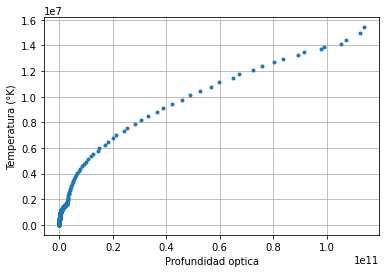

In [ ]:
plt.plot(tao,tabla['T'], '.')
plt.ylabel("Temperatura (°K)")
plt.xlabel("Profundidad optica")
plt.grid()

**c)** Investigue sobre la aproximación de atmosfera gris en equilibrio local termodinámico (LTE). Partiendo de la ecuación de transferencia radiativa demuestre cuál es la relación entre la temperatura $T$ y la temperatura efectiva $T_e$ en una estrellas. ¿Es cierto que cuando $\tau_v = 0$, $T = T_e$? Interprete sus resultados físicamente ¿que conclusión puede sacar de esto?

Partimos del Kartunen de 5.39, llegamos a $s_v$
luego con la página http://astro.if.ufrgs.br/levato/gris6/solu2.htm la 9.19

**d)** Para cada valor de la profundidad óptica, use la ecuación que encontro en el punto anterior para calcular la temperatura de  una atmósfera gris de plano paralelo en LTE. Trace estos valores de $T$ en la misma gráfica $T$ vs $\tau$

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in power
  """


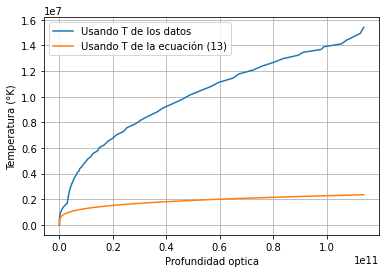

In [ ]:
Teff = 5402 #°K

#ecuación

T = Teff*(3/4*(tao+(2/3))**(1/4))

plt.plot(tao, tabla['T'], label="Usando T de los datos")
plt.plot(tao, T, label="Usando T de la ecuación (13)")
plt.ylabel("Temperatura (°K)")
plt.xlabel("Profundidad optica")
plt.grid()
plt.legend()

**e)** La simulación utiliza un supuesto simplificador de que la temperatura de la superficie es cero. Comente sobre la validez del valor en la superfcie de $T$ que encontró.

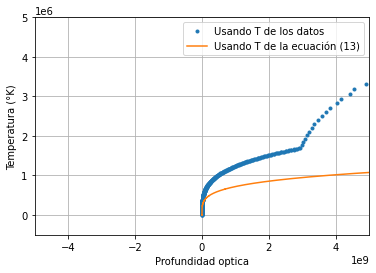

In [ ]:
plt.plot(tao, tabla['T'], '.', label="Usando T de los datos")
plt.plot(tao, T, label="Usando T de la ecuación (13)")
plt.ylabel("Temperatura (°K)")
plt.xlabel("Profundidad optica")
plt.xlim(-0.05e11,0.05e11)
plt.ylim(-0.05e7,0.5e7)
plt.grid()
plt.legend()

In [ ]:
print(f"La temperatura en la superficie de la estrella usando la ecuación es: {np.array(T[:5])}")
print(f"La temperatura en la superficie de la estrella usando los datos es: {np.array(tabla['T'][:5])}")

La temperatura en la superficie de la estrella usando la ecuación es: [3660.94351763 3660.94351763 3660.94351763 5492.3864065  5749.56298394]
La temperatura en la superficie de la estrella usando los datos es: [    0.  3167.  8562. 13970. 19390.]


# 3. Diagrama H-R:

**a)** Usando los datos en el archivo "Datos1", dibuje un diagrama de H-R "teorico", comparando $\log_{10}(\frac{L}{L_{\odot}})$ con $\log_{10}(T_{eff})$. Recuerde que la temperatura se traza de derecha a izquierda. Etiquete cada tipo en cada secuencia (es decir, MO, KO, etc). y etiquete el Sol.

In [ ]:
tabla1 = pd.read_fwf('Datos1(copia).dat')

p = tabla1['p']
m = tabla1['M']
B = tabla1['B-V']

In [ ]:
M_O = 4.81 #Magnitud bolometrica absoluta del sol

paralaje = p/1000 #Convertir mili arc sec a arc sec

r = 1/paralaje #Distancia en parsec

M = m - 5*np.log10(r/10) #Magnitud absoluta

L = 10**((M-M_O)/(-2.5)) #L/Lo

T_HR = 4200*(1/(0.92*B+1.7)+ 1/(0.92*B+0.62)) #Teff

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


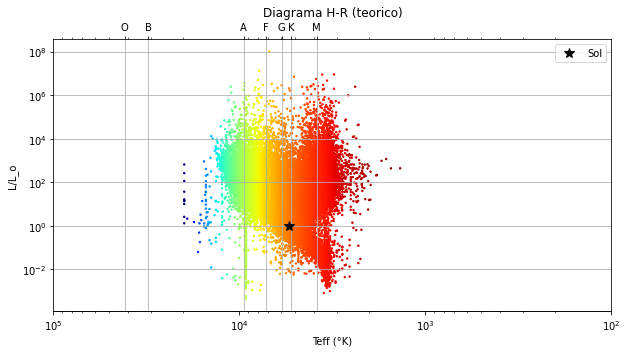

In [ ]:
figura = plt.figure(figsize = (10,5))
ax = plt.axes()
ax.xaxis.tick_top()

ax1 = ax.secondary_xaxis("bottom")
ax.set_title("Diagrama H-R (teorico)")
ax.scatter(T_HR, L, s = 2, c=T_HR, cmap='jet_r')
ax.plot(5400,1, '*k', markersize = 10, label = "Sol")

ax.set_xscale("log")
ax.set_yscale("log")

ax.set_xlim(1e+5,1e+2)
ticks = [4.14e+4, 3.1e+4, 9.5e+3, 7.24e+3, 5.92e+3, 5.30e+3, 3.85e+3] #tipos espectrales
labels = ['O', 'B', 'A', 'F', 'G', 'K', 'M']

ax.set_xticks(ticks)
ax.set_xticklabels(labels)

ax1.set_xlabel("Teff (°K)")
ax.set_ylabel("L/L_o")

ax.grid()
ax.legend()

**b)** Agregue los datos en el archivo "Datos2" en el mismo diagrama de H-R "teórico" comparando $\log_{10}{(\frac{L}{L_{\odot}})}$ con $\log_{10}{(T_{eff})}$ para enanas, gigantes y supergigantes. Etiquete cada tipo en cada secuencia y etiquete el Sol.

In [ ]:
tabla2 = pd.read_fwf('Secuencia_principal.dat')
tabla3 = pd.read_fwf('Gigantes.dat')
tabla4 = pd.read_fwf('Super_gigantes.dat')

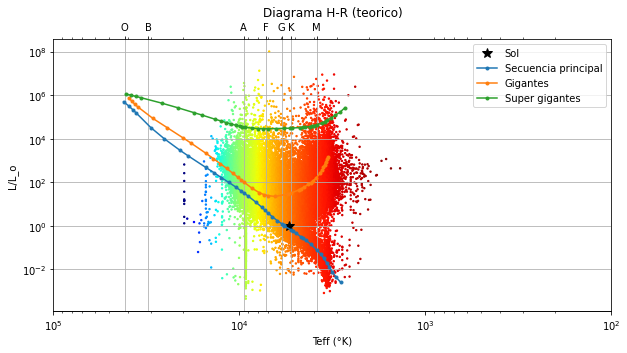

In [ ]:
figura = plt.figure(figsize = (10,5))
ax = plt.axes()
ax.xaxis.tick_top()

ax1 = ax.secondary_xaxis("bottom")
ax.set_title("Diagrama H-R (teorico)")
ax.scatter(T_HR, L, s = 2, c=T_HR, cmap='jet_r')
ax.plot(5400,1, '*k', markersize = 10, label = "Sol")
ax.plot(tabla2['(K)'], tabla2['L/L_Sun'], '.-', label = "Secuencia principal")
ax.plot(tabla3['(K)'], tabla3['L/L_Sun'], '.-', label = "Gigantes")
ax.plot(tabla4['(K)'], tabla4['L/L_Sun'], '.-', label = "Super gigantes")


ax.set_xscale("log")
ax.set_yscale("log")

ax.set_xlim(1e+5,1e+2)
ticks = [4.14e+4, 3.1e+4, 9.5e+3, 7.24e+3, 5.92e+3, 5.30e+3, 3.85e+3] #tipos espectrales
labels = ['O', 'B', 'A', 'F', 'G', 'K', 'M']

ax.set_xticks(ticks)
ax.set_xticklabels(labels)

ax1.set_xlabel("Teff (°K)")
ax.set_ylabel("L/L_o")

ax.grid()
ax.legend()

**c)** Usando la ley de Stefan-Boltzmann, indique las lineas de radio constante en este gráfico. ¿Cúal es el radio de una enana, una gigante o una supergigante según tus calculos?

In [ ]:
def L_Lo(T,R):
  T_sol = 5700
  return (T/T_sol)**4*R**2

Nt = 50
T_t = np.linspace(273,50000,Nt)

R_01 = L_Lo(T_t,0.1)  
R_1 = L_Lo(T_t,1)
R_50 = L_Lo(T_t,50)

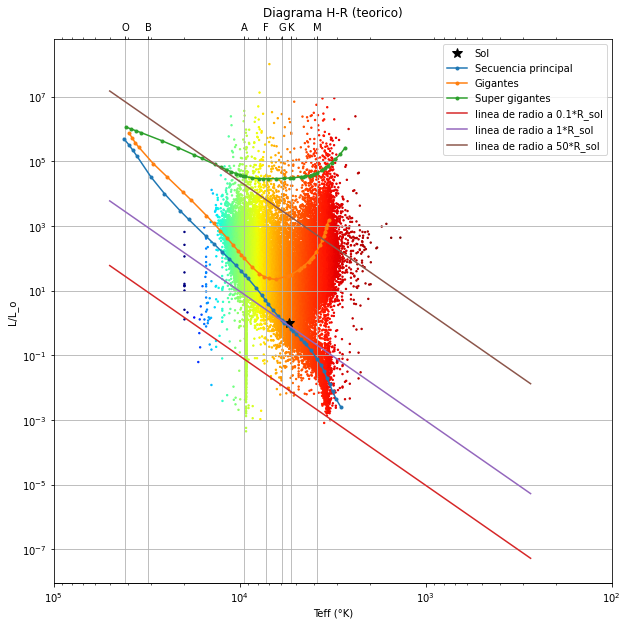

In [ ]:
figura = plt.figure(figsize = (10,10))
ax = plt.axes()
ax.xaxis.tick_top()

ax1 = ax.secondary_xaxis("bottom")
ax.set_title("Diagrama H-R (teorico)")
ax.scatter(T_HR, L, s = 2, c=T_HR, cmap='jet_r')
ax.plot(5400,1, '*k', markersize = 10, label = "Sol")
ax.plot(tabla2['(K)'], tabla2['L/L_Sun'], '.-', label = "Secuencia principal")
ax.plot(tabla3['(K)'], tabla3['L/L_Sun'], '.-', label = "Gigantes")
ax.plot(tabla4['(K)'], tabla4['L/L_Sun'], '.-', label = "Super gigantes")


#lineas de radios ctes

ax.plot(T_t,R_01, label="linea de radio a 0.1*R_sol")
ax.plot(T_t,R_1, label="linea de radio a 1*R_sol")
ax.plot(T_t,R_50, label="linea de radio a 50*R_sol")



ax.set_xscale("log")
ax.set_yscale("log")

ax.set_xlim(1e+5,1e+2)
ticks = [4.14e+4, 3.1e+4, 9.5e+3, 7.24e+3, 5.92e+3, 5.30e+3, 3.85e+3] #tipos espectrales
labels = ['O', 'B', 'A', 'F', 'G', 'K', 'M']

ax.set_xticks(ticks)
ax.set_xticklabels(labels)

ax1.set_xlabel("Teff (°K)")
ax.set_ylabel("L/L_o")

ax.grid()
ax.legend()

**d)** Usando los datos en el archivo "Datos1" y "Datos2", dibuje un diagrama de H-R "observacional" para los mismos tipos espectrales, comparando $M_v$ contra B-V. etiquete los tipos espectrales y el Sol.

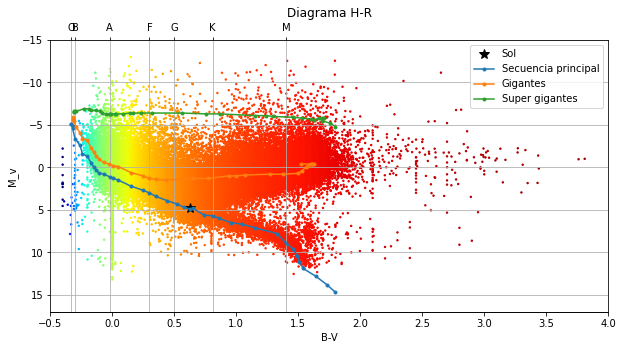

In [ ]:
figura = plt.figure(figsize = (10,5))
ax = plt.axes()
ax.xaxis.tick_top()

ax1 = ax.secondary_xaxis("bottom")
ax.set_title("Diagrama H-R")
ax.scatter(B, M, s=2, c=T_HR, cmap='jet_r' )
ax.plot(0.63,M_O, '*k', markersize = 10, label = "Sol")
ax.plot(tabla2['B-V'], tabla2['M_V'], '.-', label = "Secuencia principal")
ax.plot(tabla3['B-V'], tabla3['M_V'], '.-', label = "Gigantes")
ax.plot(tabla4['B-V'], tabla4['M_V'], '.-', label = "Super gigantes")

ax.set_xlim(-0.5,4)
ax.set_ylim(17,-15)
ticks = [-0.33, -0.3, -0.02, 0.3, 0.50, 0.81, 1.40] #tipos espectrales
labels = ['O', 'B', 'A', 'F', 'G', 'K', 'M']

ax.set_xticks(ticks)
ax.set_xticklabels(labels)

ax1.set_xlabel("B-V")
ax.set_ylabel("M_v")

ax.grid()
ax.legend()

**e)** Describe cómo difieren estas dos diagramas (teórico y observacional). ¿cuáles son algunas de las posibles razones detrás de estas diferencias? Presta especial atención a la forma de las secuencias enana, gigante y supergigante.

Archivo pdf

**f)** En la gráfica observacional, agregue los datos para las estrellas más cercanas en el archivo "Datos3" (grábelos como un símbolo diferente). En general, ¿que tipo de estrellas son las estrellas más cercanas? ¿Hay más estrellas frías/débiles o más estrellas calientes/brillantes en las proximidades del Sol?

In [ ]:
tabla5 = pd.read_fwf('Datos3(copia).dat')
tabla5

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,M_V,B-V,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18
0,Proxima Centauri (alpha,Cen,C),70890.0,M5Ve,11.01,15.45,1.81,0.77233,1.29,14.0,29.0,42.95,-62.0,40.0,46.1,-3.77564,0.76816,-33.4
1,alpha Cen B,NaN,NaN,71681.0,K1V,1.35,5.70,0.88,0.74212,1.35,14.0,39.0,35.08,-60.0,50.0,13.8,-3.60035,0.95211,-23.4
2,alpha Cen A,NaN,NaN,71683.0,G2V,-0.01,4.34,0.71,0.74212,1.35,14.0,39.0,36.50,-60.0,50.0,2.3,-3.67819,0.48184,-23.4
3,Barnard's Star,NaN,NaN,87937.0,M5V,9.54,13.24,1.57,0.54901,1.82,17.0,57.0,48.50,4.0,41.0,36.2,-0.79784,10.32693,-112.3
4,Gl 411,NaN,NaN,54035.0,M2Ve,7.49,10.46,1.50,0.39240,2.55,11.0,3.0,20.19,35.0,58.0,11.6,-0.58020,-4.76709,-85.0
5,Sirius A (alpha CMa),NaN,NaN,32349.0,A1V,-1.44,1.45,0.01,0.37921,2.64,6.0,45.0,8.92,-16.0,41.0,58.0,-0.54601,-1.22308,-7.7
6,Sirius B (alpha CMa),NaN,NaN,NaN,wd (DA),8.44,11.33,-0.03,0.37921,2.64,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Gl 729,NaN,NaN,92403.0,M4.5Ve,10.37,13.00,1.51,0.33648,2.97,18.0,49.0,49.36,-23.0,50.0,10.4,0.63755,-0.19247,-7.0
8,epsilon Eri,NaN,NaN,16537.0,K2V,3.72,6.18,0.88,0.31075,3.22,3.0,32.0,55.84,-9.0,27.0,29.7,-0.97644,0.01797,13.0
9,Gl 887,NaN,NaN,114046.0,M2Ve,7.35,9.76,1.48,0.30390,3.29,23.0,5.0,52.04,-35.0,51.0,11.1,6.76726,1.32666,-6.4


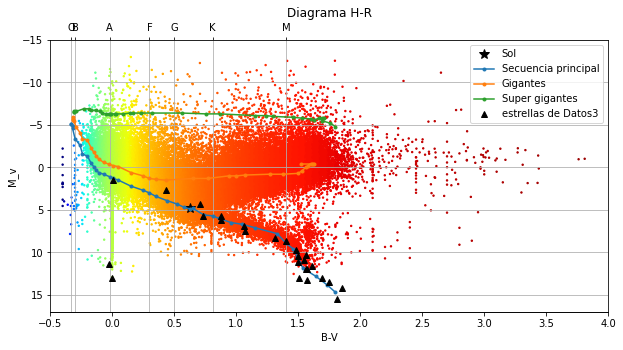

In [ ]:
figura = plt.figure(figsize = (10,5))
ax = plt.axes()
ax.xaxis.tick_top()

ax1 = ax.secondary_xaxis("bottom")
ax.set_title("Diagrama H-R")
ax.scatter(B, M, s=2, c=T_HR, cmap='jet_r' )
ax.plot(0.63,M_O, '*k', markersize = 10, label = "Sol")
ax.plot(tabla2['B-V'], tabla2['M_V'], '.-', label = "Secuencia principal")
ax.plot(tabla3['B-V'], tabla3['M_V'], '.-', label = "Gigantes")
ax.plot(tabla4['B-V'], tabla4['M_V'], '.-', label = "Super gigantes")
ax.plot(tabla5['B-V'], tabla5['M_V'], 'k^', label='estrellas de Datos3')


ax.set_xlim(-0.5,4)
ax.set_ylim(17,-15)
ticks = [-0.33, -0.3, -0.02, 0.3, 0.50, 0.81, 1.40] #tipos espectrales
labels = ['O', 'B', 'A', 'F', 'G', 'K', 'M']

ax.set_xticks(ticks)
ax.set_xticklabels(labels)

ax1.set_xlabel("B-V")
ax.set_ylabel("M_v")

ax.grid()
ax.legend()

**g)** Usando los datos en el archivo "Datos1", determine para las estrellas cualés son los tipos más comunes, las temperaturas más comunes y los colores más comunes.

In [ ]:
print(f"número de estrellas de tipo O: {len(tabla1['B-V'].loc[lambda s: s <= -0.33])}")

número de estrellas de tipo O: 18


In [ ]:
print(f"número de estrellas de O a B: {len(tabla1['B-V'].loc[lambda s: s <= -0.30])-18}")

número de estrellas de O a B: 20


In [ ]:
print(f"número de estrellas de B a A: {len(tabla1['B-V'].loc[lambda s: s <= -0.02])-20-18}")

número de estrellas de B a A: 5587


In [ ]:
print(f"número de estrellas de A a F: {len(tabla1['B-V'].loc[lambda s: s <= 0.30])-20-18-5587}")

número de estrellas de A a F: 21678


In [ ]:
print(f"número de estrellas de F a G: {len(tabla1['B-V'].loc[lambda s: s <= 0.58])-20-18-5587-21678}")

número de estrellas de F a G: 29200


In [ ]:
print(f"número de estrellas de G a K: {len(tabla1['B-V'].loc[lambda s: s <= 0.81])-20-18-5587-21678-29200}")

número de estrellas de G a K: 14121


In [ ]:
print(f"número de estrellas de K a M: {len(tabla1['B-V'].loc[lambda s: s <= 1.40])-20-18-5587-21678-29200-14121}")

número de estrellas de K a M: 35691


In [ ]:
print(f"número de estrellas de tipo M: {len(tabla1['B-V'].loc[lambda s: s >= 1.40])}")

número de estrellas de tipo M: 11727


**h)** Existe una relación entre $L$ y la $T$ para las estrellas de la secuencia principal, de ser así cual es esta.

In [ ]:
coeffs = np.polyfit(T_HR,L,deg=3)
poly = np.poly1d(coeffs)
yfit = lambda x: 10**(poly(np.log(x)))